<a href="https://colab.research.google.com/github/rselent/this_was_a_test/blob/master/build1_Airbnb_in_nyc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#!wget http://github.com/rselent/this_was_a_test/new-york-city-airbnb-open-data.zip
#!unzip new-york-city-airbnb-open-data.zip
#!head AB_NYC_2019.csv
#!unzip new-york-city-airbnb-open-data

#df = pd.read_csv( "https://github.com/rselent/this_was_a_test/AB_NYC_2019.csv")

### WGET and read_csv failing to pull from github, falling back to manual upload (bleh)

df = pd.read_csv( "AB_NYC_2019.csv")
df = df.rename( columns= {'neighbourhood_group':'borough'})
print( df.shape)
df.head()

(48895, 16)


,id,name,host_id,host_name,borough,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [27]:
 df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [0]:
######################################
###
###          IN THIS CONTAINER      
###     Culling _unreasonable_ data
###
###      (e.g., availability < 180 
###       or minimum_nights > 30)
###
######################################

#df1 = df.drop( 

#locationData = df[[ 'neighbourhood_group', 'neighbourhood', 'longitude', 
#                  'latitude']]
#print( locationData.shape)

#df['availability_365'].value_counts()
#df['minimum_nights'].value_counts()

In [47]:
df['latitude'].describe()

count    48895.000000
mean        40.728949
std          0.054530
min         40.499790
25%         40.690100
50%         40.723070
75%         40.763115
max         40.913060
Name: latitude, dtype: float64

In [48]:
df['longitude'].describe()

count    48895.000000
mean       -73.952170
std          0.046157
min        -74.244420
25%        -73.983070
50%        -73.955680
75%        -73.936275
max        -73.712990
Name: longitude, dtype: float64

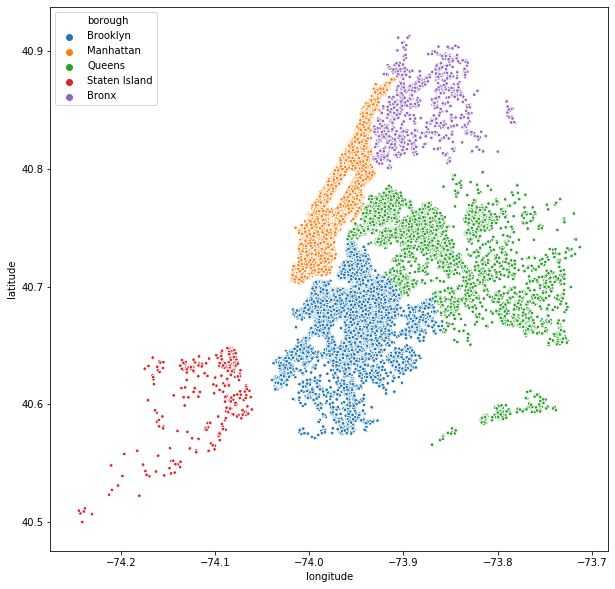

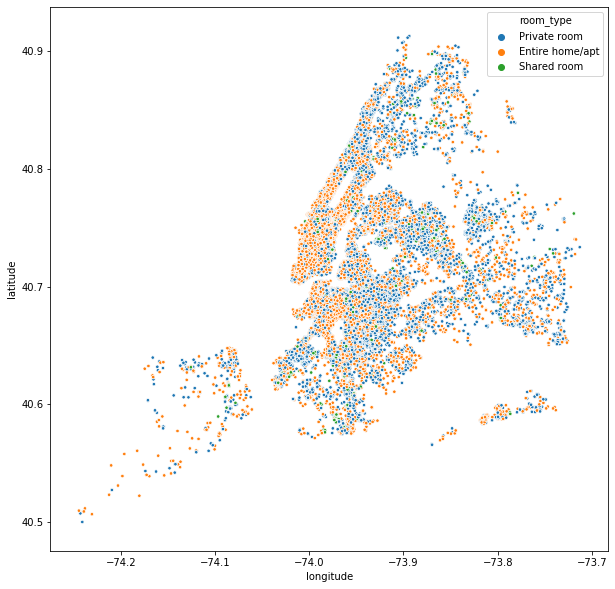

In [84]:
plt.figure( figsize= (10, 10))
sns.scatterplot( x= 'longitude', y= 'latitude', data= df, 
                hue= 'borough', s= 12);
plt.show()

plt.figure( figsize= (10, 10))
sns.scatterplot( x= 'longitude', y= 'latitude', data= df, 
                hue= 'room_type', s= 12);
plt.show()

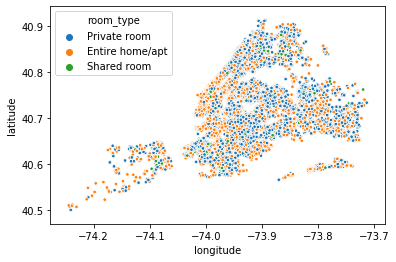

In [75]:
sns.scatterplot( x= 'longitude', y= 'latitude', data= df, hue= 'room_type', s= 12);

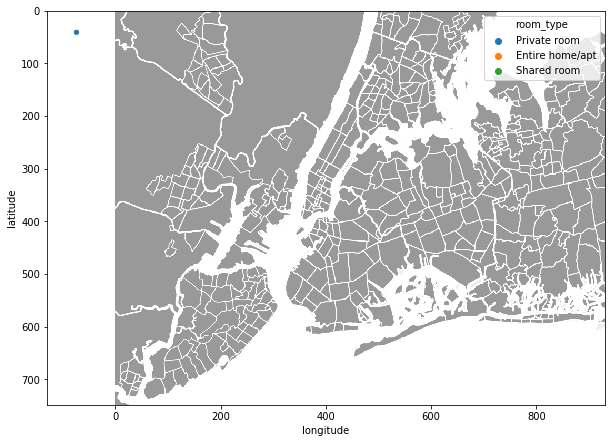

In [87]:
import matplotlib.image as mpimg

#mpimg.imread('https://static.trulia-cdn.com/images/hyperlocal/new-york/new_york_city.png')

nyc_map = mpimg.imread( 'https://static.trulia-cdn.com/images/hyperlocal/new-york/new_york_city.png') 

plt.figure( figsize= (10, 10))
plt.imshow( nyc_map)
sns.scatterplot( x= 'longitude', y= 'latitude', data= df, hue= 'room_type');
plt.show()

In [65]:
print( df['neighbourhood_group'].value_counts())
print( df['room_type'].value_counts())

pd.crosstab( df['neighbourhood_group'], df['room_type'])

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64


room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


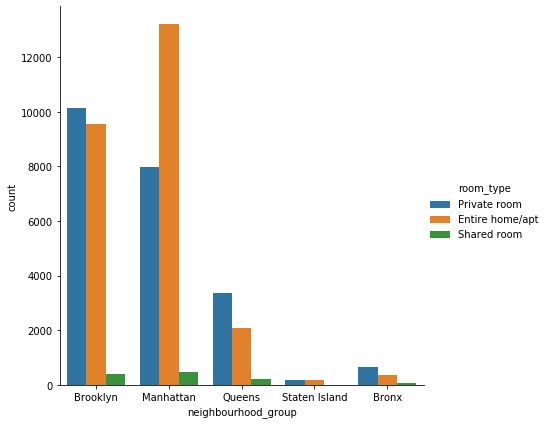

In [18]:
sns.catplot( x= 'neighbourhood_group',  hue= 'room_type', data=df,
                height=6, kind='count');

In [0]:
import plotly.graph_objects as go

fig = go.Figure( data=go.Scattergeo(
    lat = df['latitude'],
    lon = df['longitude'],
    marker = dict(
#        color = df['neighbourhood_group'],
        reversescale = True,
        opacity = 0.7,
        size = 2,
    )
))

#fig.update_layout(
#    geo = dict(
#        scope = 'usa',
#        showland = True,
#        landcolor = "rgb( 212, 212, 212)",
#        subunitcolor = "rgb( 255, 255, 255)",
#        countrycolor = "rgb( 255, 255, 255)",
#        showlakes = True,
#        lakecolor = "rgb( 255, 255, 255)",
#        showsubunits = True,
#        showcountries = True,
#        resolution = 50,
#        projection = dict(
#            type = 'conic conformal',
#           rotation_lon = -100
#       ),
#        lonaxis = dict(
#            showgrid = True,
#            gridwidth = 0.5,
#            range= [ -74.3, -73.7 ],
#            dtick = 0.5
#        ),
#        lataxis = dict (
#            showgrid = True,
#            gridwidth = 0.5,
#            range= [ 40.4, 41.0 ],
#            dtick = 0.5
#        )
#    ),
#)

fig.show()